In [69]:
import numpy as np
import pandas as pd

In [70]:
df = pd.read_excel("SampleData.xlsx")
df.fillna(method="ffill", inplace=True)

In [71]:
df['Trading Range'] = df['High'] - df['Low']
df['Change'] = df['Open'] - df['Close']
df["Change Percentage"] = (df["Change"] * 100) / df["Open"]
df["Trading Range Percentage"] = (df["Trading Range"] * 100) / df["Open"]
df["Wick to candle length"] = np.abs(df["Trading Range"] / df["Change"])

In [72]:
df_for_clustering = df[["Change Percentage", "Trading Range Percentage", "Wick to candle length"]].copy()
df_for_clustering.replace([np.inf, -np.inf], np.nan, inplace=True)
df_for_clustering.dropna(inplace=True)
array_for_training = list(df_for_clustering.values)
X = array_for_training

In [73]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=0).fit(X)

In [74]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

x_for_prediction = list(df[["Change Percentage", "Trading Range Percentage", "Wick to candle length"]].values)
df["Labels"] = model.predict(x_for_prediction)

In [75]:
df.to_excel("Sample Data With Labels.xls", index=False)

In [76]:
df_for_plot = df[[ "Change Percentage", "Trading Range Percentage", "Wick to candle length", "Labels"]]

/home/ak/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ak/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


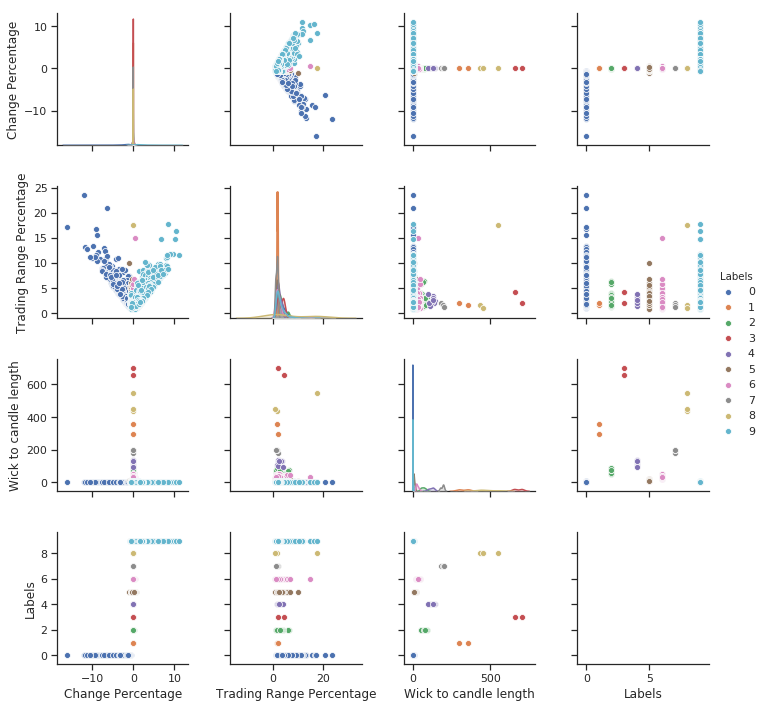

In [65]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(df_for_plot, hue="Labels")

In [80]:
LABEL_NUMBER = 5

df = pd.read_excel("Sample Data With Labels.xls")
df = df[df["Labels"] == LABEL_NUMBER]

import io
from math import pi
from bokeh.plotting import figure, show, output_file


inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.vbar(df.Date[inc], w, df.Open[inc], df.Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.Date[dec], w, df.Open[dec], df.Close[dec], fill_color="#F2583E", line_color="black")

output_file("label_"+str(LABEL_NUMBER)+".html", title="candlestick.py example")

show(p)